In [2]:
from google.colab import files
upload=files.upload()

Saving Finland#liigaUsersIDData.csv to Finland#liigaUsersIDData.csv


In [2]:
from google.colab import files
upload=files.upload()

Saving train_tweets.csv to train_tweets.csv


In [0]:
import pandas as pd

In [0]:
train_tweets = pd.read_csv('Finland#liigaUsersIDData.csv', header=0,encoding='cp1252')


In [0]:
train_tweets = train_tweets[['label','translated']][1:399]

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

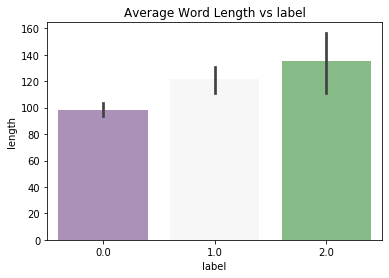

In [7]:
train_tweets['length'] = train_tweets['translated'].apply(len)
fig1 = sns.barplot('label','length',data = train_tweets,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

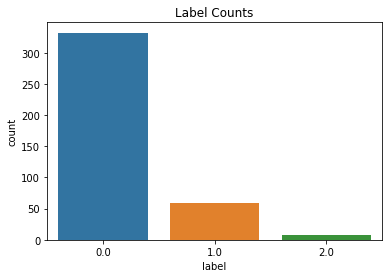

In [8]:
fig2 = sns.countplot(x= 'label',data = train_tweets)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

In [0]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [0]:
import nltk

In [11]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
train_tweets['tweet_list'] = train_tweets['translated'].apply(text_processing)


In [13]:
train_tweets[train_tweets['label']==1].drop('translated',axis=1).head()

,label,length,tweet_list
8,1.0,156,"[Top, players, do, furious, trace, begin, peri..."
13,1.0,141,"[Magical, Hallengren, series, best, superior, ..."
28,1.0,86,"[Happy, Independence, Day, Glad, självständigh..."
31,1.0,124,"[Ilves, today, better, open, Tomorrow, Saturda..."
35,1.0,52,"[even, audience, Thank, tack, HIFK]"


In [0]:
X = train_tweets['translated'][1:399]
y = train_tweets['label'][1:399]

In [0]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['translated'], train_tweets['label'], test_size=0.2)

In [16]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7f98ed67a268>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [17]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        80
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.79        80
   macro avg       0.33      0.26      0.29        80
weighted avg       1.00      0.79      0.88        80



[[63 15  2]
 [ 0  0  0]
 [ 0  0  0]]
0.7875


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Dropout, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils import to_categorical
from keras.preprocessing import sequence

from keras.datasets import imdb

from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import re

%matplotlib inline


In [0]:
def plot_accuracy(hist):
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()
    
def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()

In [0]:
all_tokenizer = Tokenizer()
all_tokenizer.fit_on_texts( train_tweets['tweet_list'] )

In [86]:
print("Documents: {}".format(all_tokenizer.document_count))
print("Unique Words: {}".format(len(all_tokenizer.word_counts)))

Documents: 398
Unique Words: 1336


In [0]:
num_words = 30000
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts( train_tweets['tweet_list'] )

In [89]:
print(tokenizer.word_index['friday'])
print(tokenizer.word_index['success'])

39
932


In [0]:
sequences = tokenizer.texts_to_sequences(train_tweets.tweet_list)

mean nmber of tokens: 9.173366834170855
std of tokens: 4.252412170456051


Text(0, 0.5, 'fraction of translated')

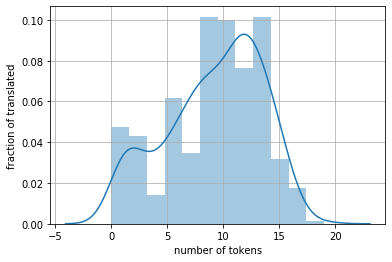

In [92]:
num_tokens = [len(tokens) for tokens in sequences]
num_tokens = np.array(num_tokens)
sn.distplot( num_tokens )
plt.grid(True)

mean_num_tokens = num_tokens.mean()
std_num_tokens = num_tokens.std()
print("mean nmber of tokens: {}".format(mean_num_tokens))
print("std of tokens: {}".format(std_num_tokens))
plt.xlabel('number of tokens')
plt.ylabel('fraction of translated')

In [93]:
max_review_length = int(mean_num_tokens + 2.15 * std_num_tokens)
print("max length taken: {}".format(max_review_length))
print("untrimmed: {}".format(np.sum(num_tokens < max_review_length) / len(num_tokens)))

max length taken: 18
untrimmed: 0.9974874371859297


In [95]:
X = pad_sequences(sequences, 
                  max_review_length, 
                  padding='pre', 
                  truncating='pre')
Y = to_categorical(np.array(train_tweets.label))
print(X.shape)

(398, 18)


In [0]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

In [99]:
embedding = 8

bow_model = Sequential()
bow_model.add(Embedding(num_words, embedding, input_length=max_review_length))
bow_model.add(Flatten())
bow_model.add(Dense(16, activation = 'relu'))
bow_model.add(Dropout(0.8))
bow_model.add(Dense(3, activation = 'softmax'))

bow_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

bow_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 18, 8)             240000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 16)                2320      
_________________________________________________________________
dropout_34 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 3)                 51        
Total params: 242,371
Trainable params: 242,371
Non-trainable params: 0
_________________________________________________________________


In [100]:
bow_history = bow_model.fit(
    XTrain, 
    YTrain,
    batch_size = 256,
    epochs = 10,
    validation_split = 0.2,
    verbose = True
)

Train on 254 samples, validate on 64 samples
Epoch 1/10
254/254 [==============================] - 1s 4ms/step - loss: 1.0783 - acc: 0.5984 - val_loss: 1.0710 - val_acc: 0.7188
Epoch 2/10
254/254 [==============================] - 0s 41us/step - loss: 1.0650 - acc: 0.6181 - val_loss: 1.0624 - val_acc: 0.7656
Epoch 3/10
254/254 [==============================] - 0s 31us/step - loss: 1.0669 - acc: 0.5984 - val_loss: 1.0537 - val_acc: 0.7969
Epoch 4/10
254/254 [==============================] - 0s 36us/step - loss: 1.0476 - acc: 0.7047 - val_loss: 1.0448 - val_acc: 0.8125
Epoch 5/10
254/254 [==============================] - 0s 29us/step - loss: 1.0442 - acc: 0.7165 - val_loss: 1.0354 - val_acc: 0.8281
Epoch 6/10
254/254 [==============================] - 0s 32us/step - loss: 1.0298 - acc: 0.7244 - val_loss: 1.0257 - val_acc: 0.8594
Epoch 7/10
254/254 [==============================] - 0s 33us/step - loss: 1.0202 - acc: 0.7402 - val_loss: 1.0157 - val_acc: 0.8594
Epoch 8/10
254/254 [=====

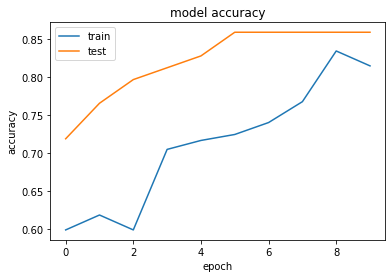

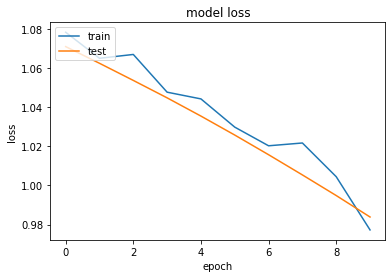

In [101]:
plot_accuracy(bow_history.history)
plot_loss(bow_history.history)

In [0]:
YPred = bow_model.predict_classes(XTest)

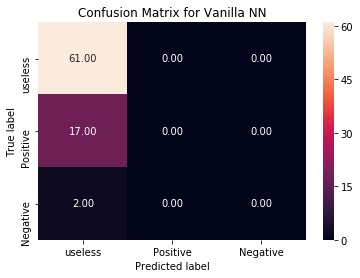

In [108]:
YPred = bow_model.predict_classes(XTest)
cm = metrics.confusion_matrix(np.argmax(YTest, axis=1),YPred)
sn.heatmap(cm, annot=True,  
           fmt='.2f', 
           xticklabels = ["useless","Positive", "Negative"] , 
           yticklabels = ["useless","Positive", "Negative"] )

plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.title( 'Confusion Matrix for Vanilla NN');